In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_lags
from sklearn.metrics import mean_squared_error

In [2]:
full = pd.read_csv('normalised_growth.csv', index_col=0, header=[0] ,parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.635906,NaN,NaN,NaN
1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.543396,NaN,NaN,NaN
1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.640650,NaN,NaN,NaN


In [3]:
# retain yoy
full.drop(columns=['A191RL1Q225SBEA'], inplace=True)

In [4]:
sliced = full.loc["1960-01-01":"2019-01-01"]
sliced.shape

(709, 31)

In [5]:
# which ones are null? drop them

for series in sliced:
    col = sliced[series]
    if col.isna().value_counts().loc[False] < sliced.shape[0]:
        print(series)
        sliced = sliced.drop(columns=series)
        
sliced.shape

INTDSRUSM193N
ISRATIO
MTSDS133FMS
T10Y2YM
USSLIND
GFDEGDQ188S
GS20
MCOILWTICO
TCU
TOTALSA


(709, 21)

In [27]:
train = sliced.loc["1960-01-01":"2010-01-01"]
test = sliced.loc["2010-02-01":]

y = train["A191RO1Q156NBEA"]
X = train.drop(columns="A191RO1Q156NBEA")

In [28]:
from utils import kernel_ridge_ar

Feature variable: 
A191RO1Q156NBEA
Dimensions of lagged X: 
(598, 60)
Fitting regression...


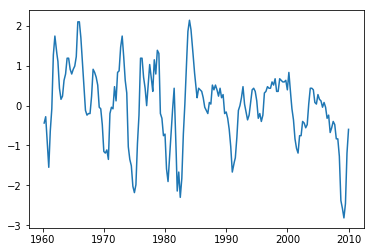

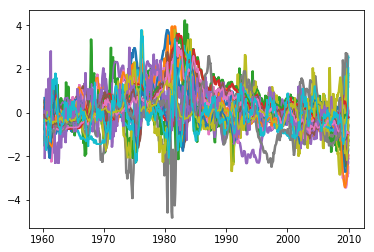

R squared:
0.9787261175640698


In [39]:
reg = kernel_ridge_ar(y, X, lags=3, kernel='polynomial')

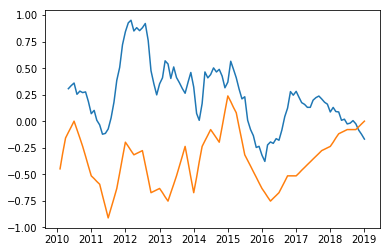

0.48429386019675164


In [40]:
y_test = test["A191RO1Q156NBEA"]
X_test = test.drop(columns="A191RO1Q156NBEA")

# performance on test set:

pred = pd.Series(reg.predict(get_lags(X_test, lags=3)[3:]),
                      index = test.index[3:])

plt.plot(pred)
plt.plot(y_test)
plt.show()

mse = mean_squared_error(pred, y_test[3:])
print(mse)

Feature variable: 
A191RO1Q156NBEA
Dimensions of lagged X: 
(706, 60)
Fitting regression...


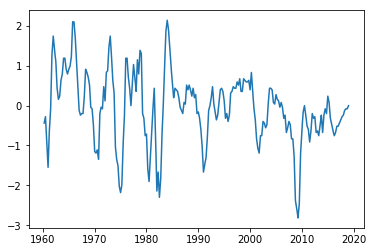

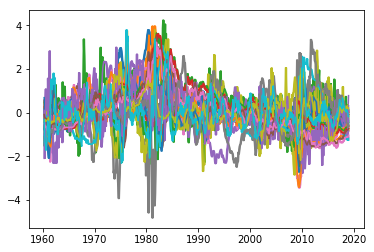

R squared:
0.9774149836901869


KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)

In [10]:
kernel_ridge_ar(y, X, lags=3, kernel='polynomial')

Feature variable: 
A191RO1Q156NBEA
Dimensions of lagged X: 
(598, 3)
Fitting regression...


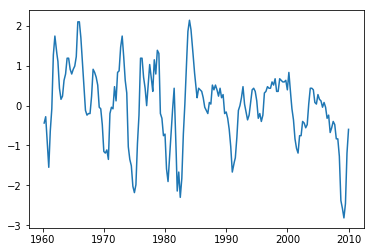

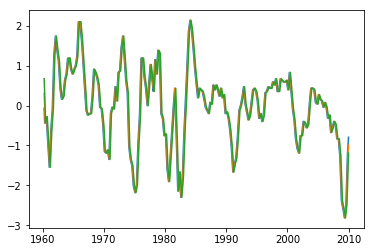

R squared:
0.9881603528112758


In [31]:
ar_reg = kernel_ridge_ar(y, y, lags=3, kernel='polynomial')

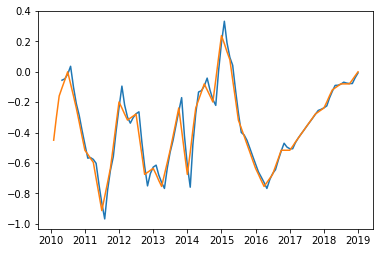

0.003676638313464905


In [33]:
# performance on test set:

pred = pd.Series(ar_reg.predict(get_lags(y_test, lags=3)[3:]),
                      index = test.index[3:])

plt.plot(pred)
plt.plot(y_test)
plt.show()

mse = mean_squared_error(pred, y_test[3:])
print(mse)

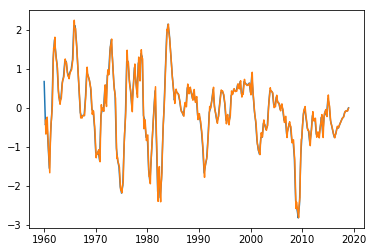

In [13]:
plt.plot(y_test)
plt.plot(pred)
plt.show()
# that's a bit ridiculous now...